# Sect 31: Intro to Time Series

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

## References

**REFERENCE CONTENTS:**
- Date StrFormatting
    - Used for:
        - Recognizing Date Formats (`pd.to_datetime`)
        - `dt_obj.strftime()`
        
- Pandas Frequency Aliases
    - Used for:
        - `df.resample()`
        - `df.asfreq()`
        - ...
        

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

### Pandas Frequency Aliases


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

# Intro to Time Series

In [1]:
!pip install -U fsds_100719
# !pip install -U scikit-learn

from fsds_100719.imports import *

fsds_1007219  v0.5.8 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
dfkc = fs.datasets.load_mod1_proj()
dfkc['date_dt'] = pd.to_datetime(dfkc['date'],errors='ignore')
dfkc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
date_dt          21597 non-null datetime64[ns]
dtypes: datetime64[ns](1), f

In [3]:
dfkc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_dt
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014-12-09
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015-02-25
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015-02-18


In [4]:
dfkc.set_index('date_dt',inplace=True)
dfkc.index

DatetimeIndex(['2014-10-13', '2014-12-09', '2015-02-25', '2014-12-09',
               '2015-02-18', '2014-05-12', '2014-06-27', '2015-01-15',
               '2015-04-15', '2015-03-12',
               ...
               '2014-08-25', '2015-01-26', '2014-10-14', '2015-03-26',
               '2015-02-19', '2014-05-21', '2015-02-23', '2014-06-23',
               '2015-01-16', '2014-10-15'],
              dtype='datetime64[ns]', name='date_dt', length=21597, freq=None)

In [5]:
## Let's make a month column to groupby
dfkc['month_int'] = dfkc.index.to_series().apply(lambda x: x.month) #x
dfkc['month_name'] =dfkc.index.to_series().apply(lambda x:x.strftime("%B"))

for col in ['month_int','month_name']:
    display(dfkc[col].value_counts(normalize=True))

5     0.111775
4     0.103209
7     0.102375
6     0.100847
8     0.089781
10    0.086864
3     0.086818
9     0.082002
12    0.068065
11    0.065241
2     0.057740
1     0.045284
Name: month_int, dtype: float64

May          0.111775
April        0.103209
July         0.102375
June         0.100847
August       0.089781
October      0.086864
March        0.086818
September    0.082002
December     0.068065
November     0.065241
February     0.057740
January      0.045284
Name: month_name, dtype: float64

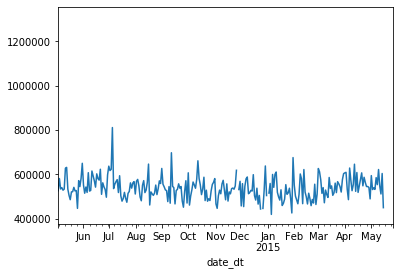

In [6]:
dfkc.resample('B')['price'].mean().plot()

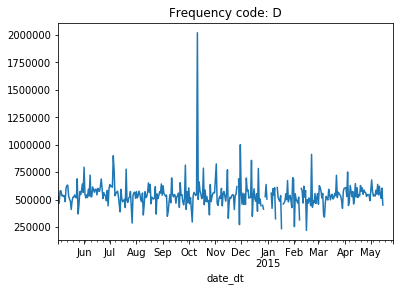

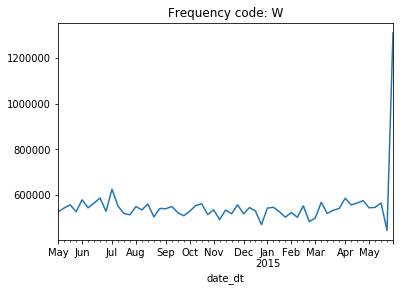

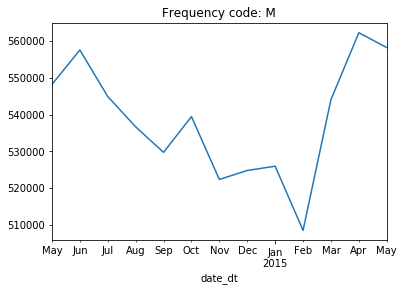

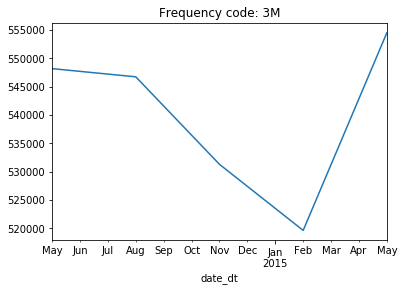

In [7]:
freq_codes = ['D','W','M','3M']
for freq in freq_codes:
    
    plt.figure()
    ax = dfkc.resample(freq)['price'].mean().plot()
    ax.autoscale(axis='x',tight=True)
    ax.set_title(f"Frequency code: {freq}")
    

## Time Series Calculations


### Rolling Statistics

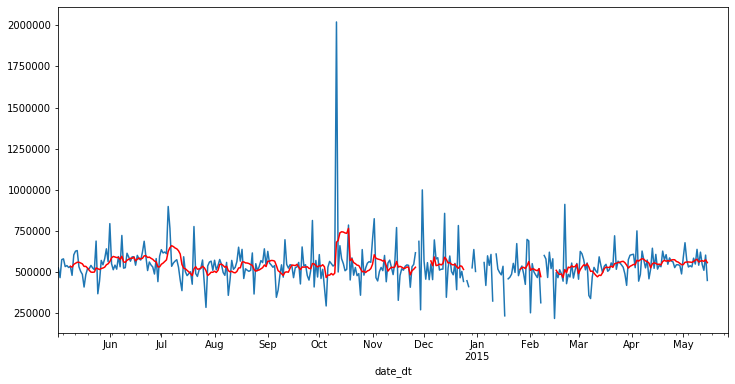

In [8]:
f,a = plt.subplots(figsize=(12,6))

ts = dfkc['price'].resample('D').mean()
rolmean = ts.rolling(window = 8, center = False).mean()
rolstd = ts.rolling(window = 8, center = False).std()

ts.plot(ax=a)
rolmean.plot(c='r')
# rolstd.plot(c='g')
# a.plot(rolmean,c='k')

# ts.rolling(7).mean().plot(c='r',ax=a)

## Time Series Trends

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-online-ds-ft-100719/master/images/new_trendseasonal.png" width=50%>

### Stationarity

<div style="text-align:center;font-size:2em">Mean</div>
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_mean_nonstationary.png" width=70%>
<br><br>
<div style="text-align:center;font-size:3em">Variance</div>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_cov_nonstationary.png" width=70%>
</div>

### Types of Trends


- https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/types-of-trends

In [11]:
ts.fillna(method='ffill',inplace=True)
ts

date_dt
2014-05-02    5.261918e+05
2014-05-03    4.669700e+05
2014-05-04    5.766900e+05
2014-05-05    5.810577e+05
2014-05-06    5.341684e+05
                  ...     
2015-05-23    4.500000e+05
2015-05-24    4.455000e+05
2015-05-25    4.455000e+05
2015-05-26    4.455000e+05
2015-05-27    1.310000e+06
Freq: D, Name: price, Length: 391, dtype: float64

In [13]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(ts)
test_columns = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']
len(test_columns)

for i,val in enumerate(adf[:4]):
    print(f"{test_columns[i]:40} = {val}")


Test Statistic                           = -18.75304124383
p-value                                  = 2.0273774397840847e-30
#Lags Used                               = 0
Number of Observations Used              = 390


In [16]:
def adf_output(result):
    """Null Hypothesis/p-value interpretation.(from https://machinelearningmastery.com/time-series-data-stationary-python/)
    - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary."""
    data = result[:4]
    test_columns = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']
    return pd.Series(data,index=test_columns)

def adfuller_test(ts,adfuller_kws=None):
    """Null Hypothesis/p-value interpretation.(from https://machinelearningmastery.com/time-series-data-stationary-python/)
    - p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    - p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary."""
    if adfuller_kws is None:
        result = adfuller(ts)
    
    else:
        result = adfuller(ts,**adfuller_kws)
        
    data = result[:4]
    
    test_columns = ['Test Statistic','p-value','#Lags Used','Number of Observations Used']

    results = pd.Series(data,index=test_columns)
    results['sig'] = np.where(results['p-value']<.05,True,False)
    if results['sig']:
        print("The data is stationary and does not have a unit root.")
    else:
        print("The data is NOT stationary and has a unit root.")
    return results

# adf = adfuller(ts)
# adf_output(adf)

adfuller_test(ts)

The data is stationary and does not have a unit root.


Test Statistic                     -18.753
p-value                        2.02738e-30
#Lags Used                               0
Number of Observations Used            390
sig                                   True
dtype: object

In [17]:
## Lab Function
def stationarity_check(TS,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

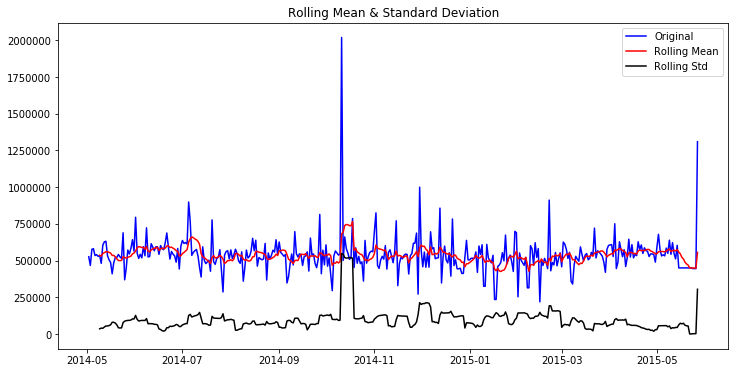

Results of Dickey-Fuller Test:
Test Statistic                -1.875304e+01
p-value                        2.027377e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.900000e+02
Critical Value (1%)           -3.447229e+00
Critical Value (5%)           -2.868980e+00
Critical Value (10%)          -2.570733e+00
dtype: float64


In [18]:
stationarity_check(ts)

### Removing Trends 
- .diff()
- subtract rolling mean
- seasonal decomposition

## New ts datasets to test

In [19]:
# baltimore_crime ="https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/BPD_Part_1_Victim_Based_Crime_Data.csv"
# std_rates = "https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/STD%20Cases.csv"
# no_sex_xlsx = "https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/Americans%20Sex%20Frequency.xlsx"

learn_passengers="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-lab-online-ds-ft-100719/master/passengers.csv"

## Baltimore Crime

In [20]:
baltimore_crime ="https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/BPD_Part_1_Victim_Based_Crime_Data.csv"
df = pd.read_csv(baltimore_crime,low_memory=False,parse_dates=True)
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1
1,12/14/2019,07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1
2,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1
4,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1


___

In [21]:
df['date'] = pd.to_datetime(df['CrimeDate'])
df.set_index('date',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 286609 entries, 2019-12-14 to 1963-10-30
Data columns (total 16 columns):
CrimeDate          286609 non-null object
CrimeTime          286585 non-null object
CrimeCode          286609 non-null object
Location           285342 non-null object
Description        286609 non-null object
Inside/Outside     254172 non-null object
Weapon             60141 non-null object
Post               284298 non-null object
District           286609 non-null object
Neighborhood       276194 non-null object
Longitude          285031 non-null float64
Latitude           285031 non-null float64
Location 1         0 non-null float64
Premise            253920 non-null object
vri_name1          33866 non-null object
Total Incidents    286609 non-null int64
dtypes: float64(3), int64(1), object(12)
memory usage: 37.2+ MB


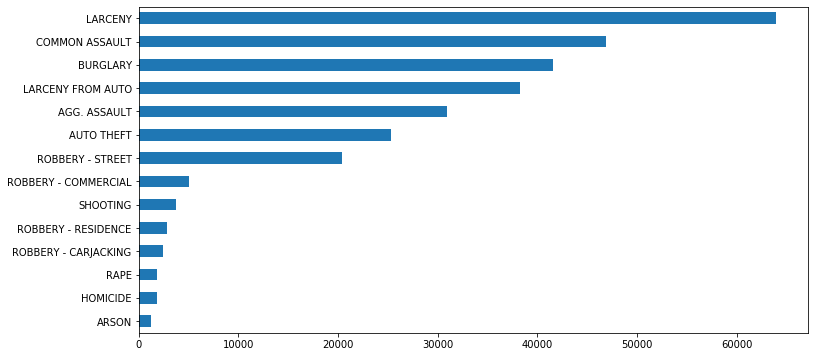

In [22]:
plot_kws=dict(
    figsize=(12,6),
    kind='barh')
f,a = plt.subplots()#ncols=2)
df['Description'].value_counts(ascending=True).plot(**plot_kws,ax=a)
# df['Description'].value_counts(ascending=True).plot(ax=a[1],rot=True)

In [23]:
a.xaxis

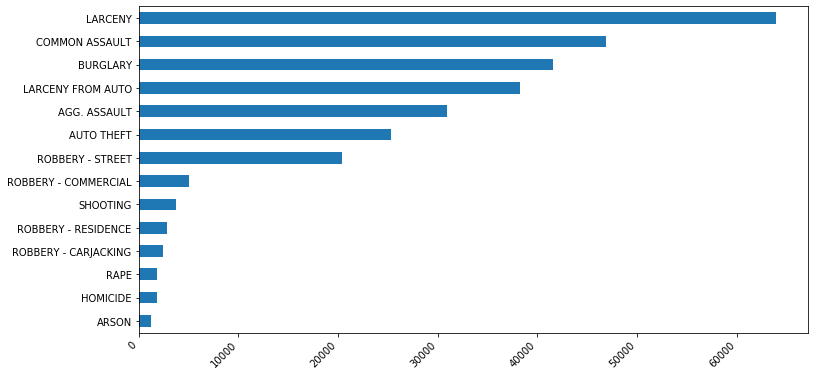

In [24]:
a.xaxis.set_ticklabels(a.xaxis.get_ticklabels(),**{'rotation':45,
                                                    'ha':'right'})
f

In [25]:
df_crimes = df.copy()
df_crimes = pd.get_dummies(df,columns=['Description'],)
df_crimes

,CrimeDate,CrimeTime,CrimeCode,Location,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,...,Description_COMMON ASSAULT,Description_HOMICIDE,Description_LARCENY,Description_LARCENY FROM AUTO,Description_RAPE,Description_ROBBERY - CARJACKING,Description_ROBBERY - COMMERCIAL,Description_ROBBERY - RESIDENCE,Description_ROBBERY - STREET,Description_SHOOTING
date,,,,,,,,,,,,,,,,,,,,,
2019-12-14,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,...,0,1,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,07:30:00,3B,600 S MONROE ST,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,...,0,0,0,0,0,0,0,0,1,0
2019-12-14,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,...,0,0,0,0,0,0,0,1,0,0
2019-12-14,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,...,0,0,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,O,NaN,523,NORTHERN,ROSEBANK,-77.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01,01/01/1978,10:30:00,2A,1900 ARGONNE DR,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,...,0,0,0,0,1,0,0,0,0,0
1977-05-01,05/01/1977,00:01:00,2A,600 W 34TH ST,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,...,0,0,0,0,1,0,0,0,0,0
1975-06-01,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
crime_cols = [col for col in df_crimes.columns if 'Description_' in col]
crime_cols

['Description_AGG. ASSAULT',
 'Description_ARSON',
 'Description_AUTO THEFT',
 'Description_BURGLARY',
 'Description_COMMON ASSAULT',
 'Description_HOMICIDE',
 'Description_LARCENY',
 'Description_LARCENY FROM AUTO',
 'Description_RAPE',
 'Description_ROBBERY - CARJACKING',
 'Description_ROBBERY - COMMERCIAL',
 'Description_ROBBERY - RESIDENCE',
 'Description_ROBBERY - STREET',
 'Description_SHOOTING']

In [27]:
new_names = [x.replace('Description_','') for x in crime_cols]
rename_dict = dict(zip(crime_cols,new_names))
rename_dict

{'Description_AGG. ASSAULT': 'AGG. ASSAULT',
 'Description_ARSON': 'ARSON',
 'Description_AUTO THEFT': 'AUTO THEFT',
 'Description_BURGLARY': 'BURGLARY',
 'Description_COMMON ASSAULT': 'COMMON ASSAULT',
 'Description_HOMICIDE': 'HOMICIDE',
 'Description_LARCENY': 'LARCENY',
 'Description_LARCENY FROM AUTO': 'LARCENY FROM AUTO',
 'Description_RAPE': 'RAPE',
 'Description_ROBBERY - CARJACKING': 'ROBBERY - CARJACKING',
 'Description_ROBBERY - COMMERCIAL': 'ROBBERY - COMMERCIAL',
 'Description_ROBBERY - RESIDENCE': 'ROBBERY - RESIDENCE',
 'Description_ROBBERY - STREET': 'ROBBERY - STREET',
 'Description_SHOOTING': 'SHOOTING'}

In [28]:
df_crimes.rename(rename_dict,axis=1,inplace=True)
df_crimes.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,...,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
date,,,,,,,,,,,,,,,,,,,,,
2019-12-14,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,...,0,1,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,07:30:00,3B,600 S MONROE ST,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,...,0,0,0,0,0,0,0,0,1,0
2019-12-14,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,...,0,0,0,0,0,0,0,1,0,0
2019-12-14,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,...,0,0,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,O,NaN,523,NORTHERN,ROSEBANK,-77.0,...,0,0,0,0,0,0,0,0,0,0


# BOOKMARK NEXT CLASS

<class 'matplotlib.axes._subplots.AxesSubplot'>


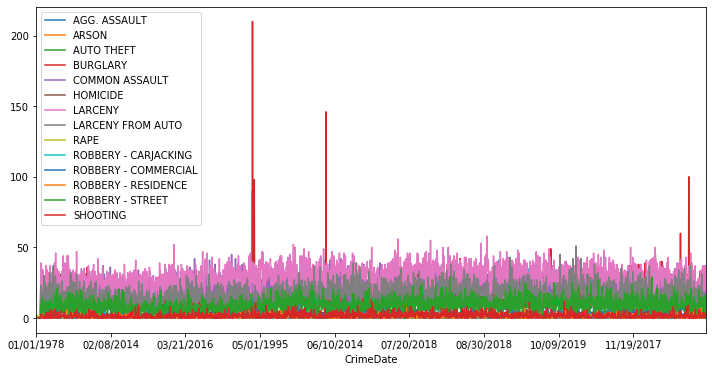

In [29]:
crime_cols = new_names
ax = df_crimes.groupby('CrimeDate')[crime_cols].sum().plot(figsize=(12,6),rot=True)
print(type(ax) )


In [30]:
df_counts = df_crimes.groupby('CrimeDate').count()[crime_cols]
df_counts.index  = pd.to_datetime(df_counts.index)

In [31]:
df_counts.index

DatetimeIndex(['1978-01-01', '1985-01-01', '1993-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2003-01-01',
               '2004-01-01', '2007-01-01',
               ...
               '2014-12-30', '2015-12-30', '2016-12-30', '2017-12-30',
               '2018-12-30', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='CrimeDate', length=2243, freq=None)

In [32]:
df_counts.loc['2014':]


,AGG. ASSAULT,ARSON,AUTO THEFT,BURGLARY,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
CrimeDate,,,,,,,,,,,,,,
2014-01-01,137,137,137,137,137,137,137,137,137,137,137,137,137,137
2015-01-01,161,161,161,161,161,161,161,161,161,161,161,161,161,161
2016-01-01,153,153,153,153,153,153,153,153,153,153,153,153,153,153
2017-01-01,155,155,155,155,155,155,155,155,155,155,155,155,155,155
2018-01-01,124,124,124,124,124,124,124,124,124,124,124,124,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31,109,109,109,109,109,109,109,109,109,109,109,109,109,109
2015-12-31,99,99,99,99,99,99,99,99,99,99,99,99,99,99
2016-12-31,125,125,125,125,125,125,125,125,125,125,125,125,125,125


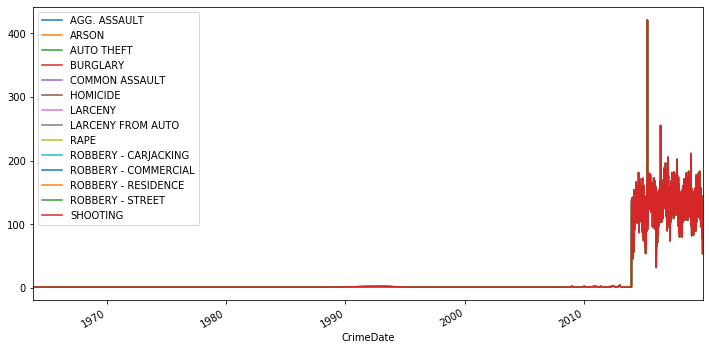

In [33]:
df_counts.plot(figsize=(12,6))

In [34]:
df_counts.index

DatetimeIndex(['1978-01-01', '1985-01-01', '1993-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2003-01-01',
               '2004-01-01', '2007-01-01',
               ...
               '2014-12-30', '2015-12-30', '2016-12-30', '2017-12-30',
               '2018-12-30', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='CrimeDate', length=2243, freq=None)

In [35]:
df_counts = df_counts.loc['2014':'2019']
df_counts.index

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01', '2019-01-01', '2014-01-02', '2015-01-02',
               '2016-01-02', '2017-01-02',
               ...
               '2014-12-30', '2015-12-30', '2016-12-30', '2017-12-30',
               '2018-12-30', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='CrimeDate', length=2174, freq=None)

In [86]:
(df_counts['AGG. ASSAULT'] != df_counts['ARSON']).sum()

0

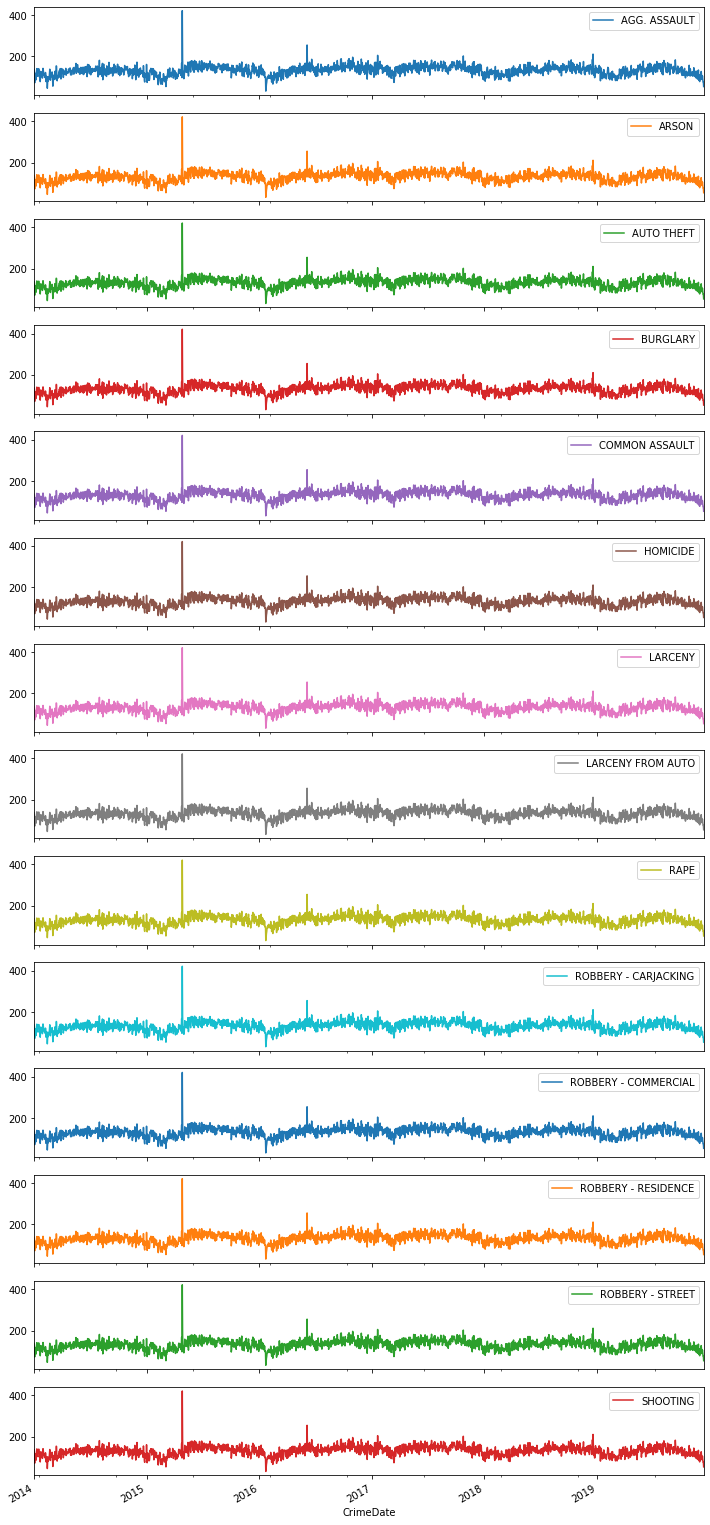

In [36]:
df_counts.plot(figsize=(12,30),subplots=True);

In [37]:
adfuller(df_counts['BURGLARY'])

(-2.6846279971134495,
 0.07673627931296431,
 24,
 2149,
 {'1%': -3.433396592961799,
  '5%': -2.8628858719817356,
  '10%': -2.5674864760910148},
 18682.231177973335)

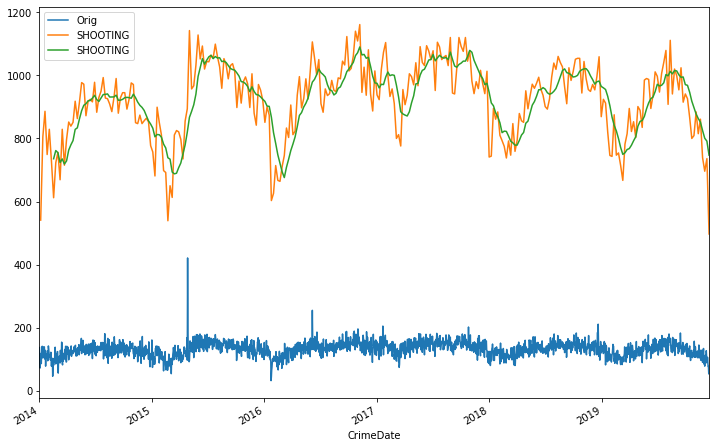

In [38]:
plt.figure(figsize=(12,8))
ts = df_counts['SHOOTING']
ts.plot(label='Orig')
ts.resample('W').sum().plot() #.rolling.mean(7)
ts.resample('W').sum().rolling(7).mean().plot()
plt.legend()

In [39]:
# # Use pandas grouper to group values using annual frequency
# fig,ax = plt.subplots(figsize = (20,10))


# Seasonal Decomposition - COVER ON 12/19/19

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
crime_dates = df_counts.groupby(pd.Grouper(freq ='d')).sum()
crime_dates.loc['2014':].plot(ax=ax)
# for yr,grps in crime_dates:
#     df[grps].plot()
crime_2014 = crime_dates.loc['2014':]

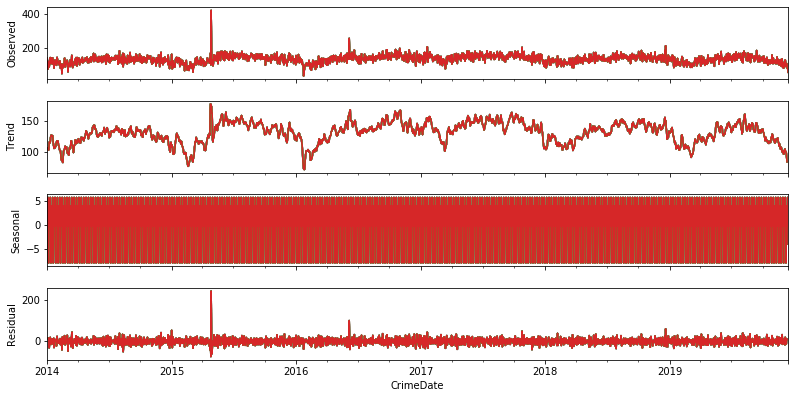

In [70]:
decomp = seasonal_decompose(crime_2014)
decomp.plot()
ax =plt.gca()#@ @decomp.plot();
fig = ax.get_figure()
fig.set_size_inches((12,6))
# fig

In [76]:
df_season = decomp.seasonal
df_residual = decomp.resid
df_trend = decomp.trend

df_season.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-07', '2014-01-08',
               '2014-01-09', '2014-01-10',
               ...
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-14'],
              dtype='datetime64[ns]', name='CrimeDate', length=2174, freq='D')

In [79]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(crime_2014['LARCENY'])
dftest


(-3.419808086443944,
 0.010301866701615143,
 20,
 2153,
 {'1%': -3.433390926009787,
  '5%': -2.862883369807779,
  '10%': -2.567485143841676},
 18563.027000506867)

matplotlib.figure.Figure

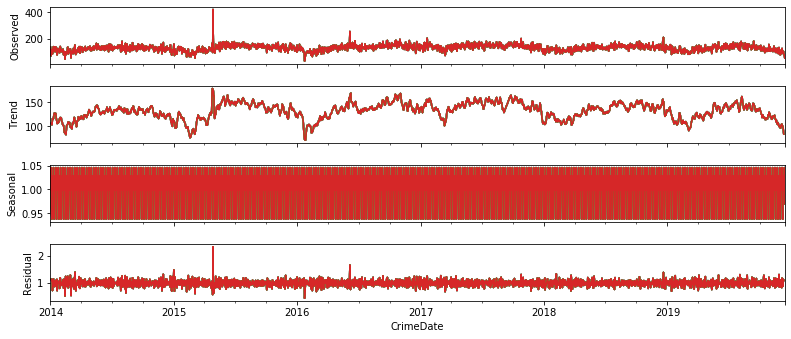

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(crime_2014, model='mul')
fig = result.plot()
# fig.set_size_inches(12,6)
fig.set(**{'size_inches':(12,5)})
type(fig)

In [81]:
# ax = fig.get_axes()
# ax[-1].axvline(x='2015-04-18')#::'May 3, 2015
# ax[-1].axvline(x='2015-05-03')
# fig

In [82]:
# url = "https://en.wikipedia.org/wiki/2015_Baltimore_protests"
# pre_riot = crime_2014.loc['2015':'2016']
# pre_riot